# HomeWork C1W4 "Центральная предельная теорема"

Мне хотелось бы закончить курс на **100%**, пожалуйста не снижайте оценку без особых на то причин, я очень старался =)

Изначально я выбрал распределение Гомперца, это теоретическое распределение времен жизни, вероятностная модель человеческой смертности. Но потом я дошел до расчета дисперссии... И вот формула =)))))

![](https://github.com/DoroninDobro/Yandex_specialization_ML_HW_C1_W4/blob/master/Screenshot%20from%202020-03-14%2015-44-42.png?raw=true)

Поэтому после горького опыта решено было взять распределение t-Стьюдента. Оно очень похоже на нормальное распределение, **но** имеет более "тяжелые" хвосты.

![](https://nsu.ru/mmf/tvims/chernova/ms/lec/img782.gif)

In [219]:
# импортируем все необходимое
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as sts
from scipy.stats import t
%matplotlib inline

## Student's t-distribution

*Распределение было впервые получено Госсетом под псевдонимом в 1876 году. Интересно, что причина псевдонима была в том, что Госсет работал на и ныне широко известную пивоваренную компанию **Guiness**. Получена как результат нескольколетней работы над улучшением сортов ячменя и рецепта пива. И чтобы конкуренты не могли использовать ее для своих целей и был создан псевдоним. Есть байка, что якобы ученый сделал это тайно от работодателя, но достоверные источники в лице биографов опровергают это. Госсет просто смог убедить работодателя, что у конкурентов нету шансов связать эти два события.*

*К разочарованию Госсета и вероятно спокойствию работодателей, достаточно долгое время вообще никто не оценил это открытие. Не только конкурирующие пивоваренные компании)) Первым, кто понял значение работ Госсета по оценке параметров малой выборки, был биолог Рональд Фишер. Госсет написал ему: «Я посылаю вам копию таблиц Стьюдента, поскольку вы, похоже, единственный человек, который когда-либо станет пользоваться ими!» Фишер считал, что Госсет совершил «логическую революцию». Знаменитое распределение Фишера, а также вообще вся t-статистика была изобретена Фишером на основе работ Госсета.*

[Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

In [191]:
# генерируем случайную выборку объемом 1000
# dist от английского слова distribution,
df = 6
t_dist = t(df)
t_sample = t_dist.rvs(1000)

df здесь "degrees of freedom", мера степеней свободы. Фактически это размер выборки минус один. Подробно и понятно вы можете почитать [тут](https://habr.com/ru/company/stepic/blog/311354/)

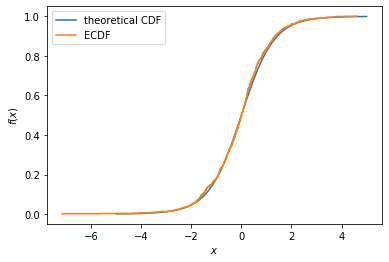

In [195]:
# Эмпирическая функция распределения для полученной выборки:
x = np.linspace(-5,5,100)
cdf = t_dist.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
ecdf = ECDF(t_sample)
plt.step(ecdf.x, ecdf.y, label='ECDF');

plt.ylabel('$f(x)$');
plt.xlabel('$x$');
plt.legend(loc='upper left');

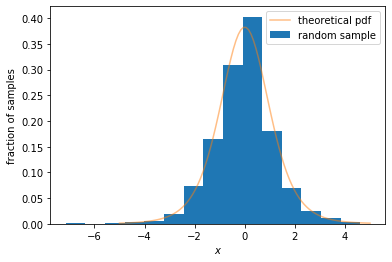

In [214]:
# Гистограмма выборки
plt.hist(t_sample, bins=15, density=True, label='random sample') # normed=True устарела
# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-5,5,100)
pdf = t_dist.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5);
plt.ylabel('fraction of samples');
plt.xlabel('$x$');
plt.legend(loc='upper right');

In [202]:
# Сделаем по 1000 выборок из 5, 10 и 50. Параметр везде используем одинаковый.

def sample(n):
    samples = np.zeros(1000)
    for index in range(len(samples)):
        # для каждой выборки найдем среднюю 
        samples[index] = t.rvs(6, size = n).mean()      
    return samples

sample_5 = sample(5)
sample_10 = sample(10)
sample_50 = sample(50)

Расчеты весьма просты:

1) среднее, матожидание и медиана совпадают в точке 0, при n > 1

2) дисперссия при n > 2 $$n\over(n-2)$$

Где n - степени свободы (df в коде).

**То есть для нашего случая: 0 и 1.5 соответсвенно.**

В scipy.stats.norm распределение задается через $\mu$ и $\sigma$ поэтому мы считаем $\sqrt{DX/n}$, где n-размер выборки.

Cоответсвенно, $p = N(EX, \frac{DX}{n}) = N(0, \sqrt{\frac{1.5}{n}})$ 

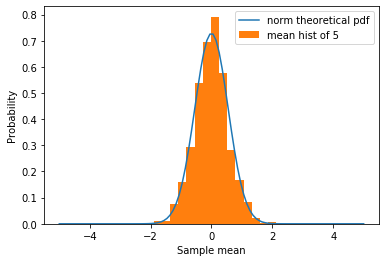

In [243]:
# построим гистограмму и график нормального распределения для выборки размера 5
x = np.linspace(-5,5,100)
norm_rv = sts.norm(0, np.sqrt(1.5/5))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='norm theoretical pdf');
plt.hist(sample_5, bins=15, density=True, label='mean hist of 5');
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.legend();

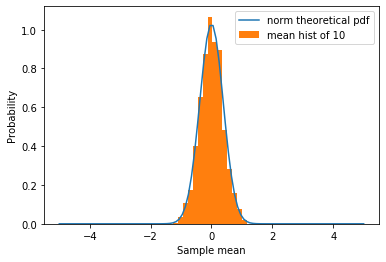

In [244]:
# построим гистограмму и график нормального распределения для выборки размера 10
x = np.linspace(-5,5,100)
norm_rv = sts.norm(0, np.sqrt(1.5/10))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='norm theoretical pdf');
plt.hist(sample_10, bins=15, density=True, label='mean hist of 10');
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.legend();

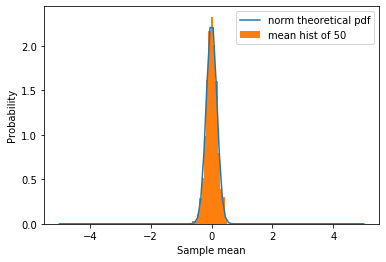

In [245]:
# построим гистограмму и график нормального распределения для выборки размера 50
x = np.linspace(-5,5,100)
norm_rv = sts.norm(0, np.sqrt(1.5/50))
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='norm theoretical pdf');
plt.hist(sample_50, bins=15, density=True, label='mean hist of 50');
plt.xlabel('Sample mean')
plt.ylabel('Probability')
plt.legend();

### Вывод.

А вывод ожидаем)

При увеличении размера выборки n, распределение средних значений начинает сходиться к 0, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.

При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.

#### Спасибо за проверку ;-)